In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tushare as ts
import warnings;
warnings.simplefilter('ignore')

In [3]:
hs300 = ts.get_k_data('hs300',start='2015-01-01',end='2017-06-30')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [4]:
hs300

,date,open,close,high,low,volume,code
0,2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
1,2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2,2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
3,2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
4,2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300
...,...,...,...,...,...,...,...
602,2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300
603,2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300
604,2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300
605,2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300


In [5]:
# 设置时间索引
hs300.set_index('date',inplace=True)
hs300.head()

,open,close,high,low,volume,code
date,,,,,,
2015-01-05,3566.09,3641.54,3669.04,3551.51,451198098.0,hs300
2015-01-06,3608.43,3641.06,3683.23,3587.23,420962185.0,hs300
2015-01-07,3620.92,3643.79,3671.19,3601.70,320191232.0,hs300
2015-01-08,3650.07,3559.26,3659.95,3552.10,295003045.0,hs300
2015-01-09,3547.57,3546.72,3689.75,3536.40,349982672.0,hs300


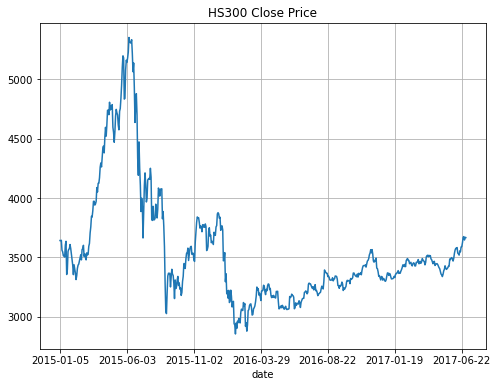

In [7]:
hs300['close'].plot(figsize=(8,6),grid=True,title='HS300 Close Price')

In [11]:
# 连续收益的计算方法
hs300['return'] = np.log(hs300['close']/hs300['close'].shift(1))

In [12]:
hs300[['close','return']].tail()

,close,return
date,,
2017-06-26,3668.09,0.012402
2017-06-27,3674.72,0.001806
2017-06-28,3646.17,-0.007800
2017-06-29,3668.83,0.006196
2017-06-30,3666.80,-0.000553


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170565CE948>,
      dtype=object)

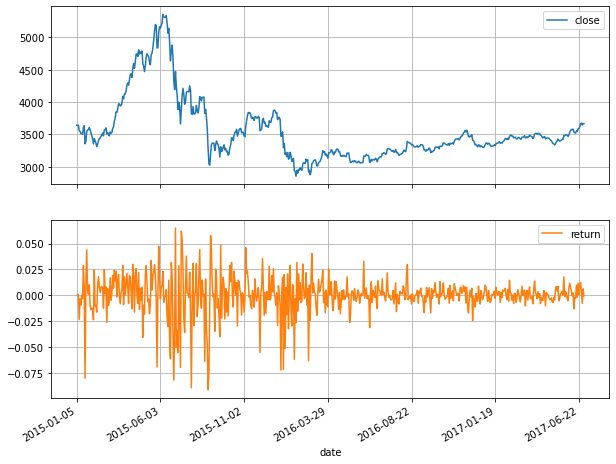

In [10]:
# 分图、网格
hs300[['close','return']].plot(subplots=True,figsize=(10,8),grid=True)

In [13]:
# 计算价格的移动平均，必背：SMA策略
hs300['SMA20'] = hs300['close'].rolling(window=20).mean()
hs300.tail()

,open,close,high,low,volume,code,return,SMA20
date,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,0.012402,3544.9575
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,0.001806,3554.6720
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,-0.007800,3562.3365
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,0.006196,3570.8910
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,-0.000553,3579.9055


In [14]:
import talib as ta
hs300['SMA20_talib'] = ta.SMA(np.asarray(hs300['close']),20)
hs300.tail()

,open,close,high,low,volume,code,return,SMA20,SMA20_talib
date,,,,,,,,,
2017-06-26,3627.02,3668.09,3671.94,3627.02,134637995.0,hs300,0.012402,3544.9575,3544.9575
2017-06-27,3665.58,3674.72,3676.53,3648.76,97558702.0,hs300,0.001806,3554.6720,3554.6720
2017-06-28,3664.16,3646.17,3672.19,3644.03,97920858.0,hs300,-0.007800,3562.3365,3562.3365
2017-06-29,3649.25,3668.83,3669.13,3644.73,85589498.0,hs300,0.006196,3570.8910,3570.8910
2017-06-30,3654.73,3666.80,3669.76,3646.23,81510028.0,hs300,-0.000553,3579.9055,3579.9055


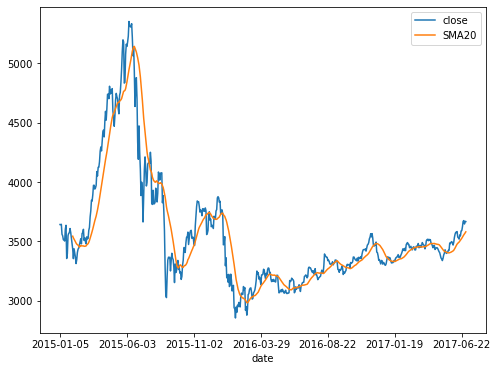

In [15]:
hs300[['close','SMA20']].plot(figsize=(8,6))

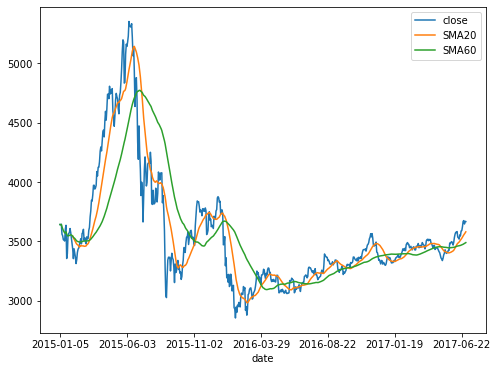

In [17]:
# 移动平均
hs300['SMA60'] = hs300['close'].rolling(window=60,min_periods=0).mean()  # min_periods 
hs300[['close','SMA20','SMA60']].plot(figsize=(8,6))

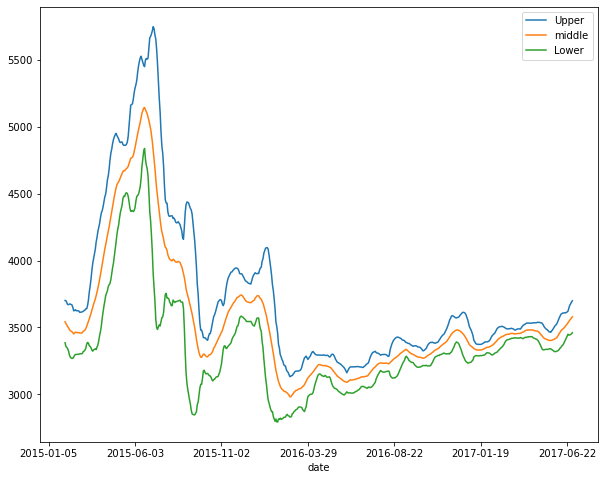

In [18]:
# 布林带,上下轨
hs300['Upper'],hs300['middle'],hs300['Lower'] = ta.BBANDS(np.asarray(hs300['close']),timeperiod=20,nbdevup=2,nbdevdn=2,matype=0)
hs300[['Upper','middle','Lower']].plot(figsize=(10,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001705A39CBC8>,
      dtype=object)

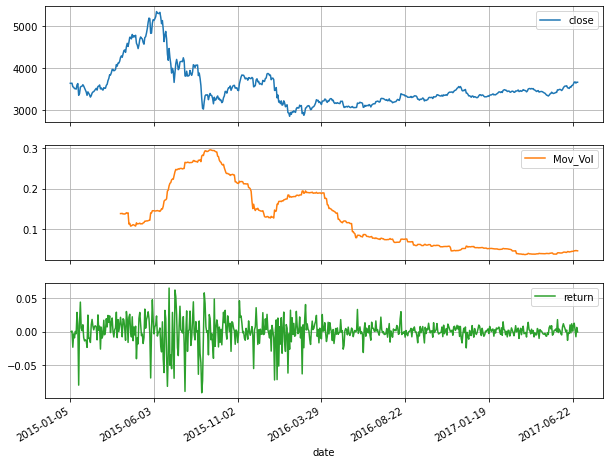

In [20]:
import math
hs300['Mov_Vol'] = hs300['return'].rolling(window=252).std() * math.sqrt(252)  # 年化波动率
hs300[['close','Mov_Vol','return']].plot(subplots=True,figsize=(10,8),grid=True)